# Проектная работа 3 Курс 2021/2022

# Идентификация фунции фитнеса методами машинного обучения

# Этап 0 | Постановка задачи | Ожидаемый результат

Цель проекта: Восстановление функции фитнеса, с помощью различных методов машинного обучения

План работы:
- Теоретический модуль
   1. Для начала стоит изучить доступную литературу по данному предмету (список находится в конце Этапа 0)
   2. Изучить базовые возможности и синтаксис языка программирования Python
   3. Создание и исследование математической модели
   4. Ознакомление с возможностями Jupiter Notebook
- Практический модуль
   1. Создание обучающей выборки
   2. Обучение классификаторов
   3. Проверка качества классификатора
   4. Дополнительная проверка качества классификатора
   5. Правка багов и аномалий (тестирование и исправление ошибок)
   6. Написание финального отчета по окончаю проекта

Краткое изложение всей теоретической базы (*За более подробными данными в список литературы*)

Функция фитнеса - это функция биологической приспособленности
- Благодаря выявлению функции фитнеса есть возможность найти оптимальное решение
- Следовательно найти оптимальную стратегию поведения

Фитнес всегда определятеся по разному, но по всем (**моим**) наблюдениям это какая-то функция, которая зависит от различных параметров. Эти параметры (*Макропараметры*) в данной проектной работе представляют из себя описание окружающей среды, количество хищников, естественную смертность и тд. (*Более подробно в Этапе 1)

> Читатель: Почему объектом изучения является Зоопланктон?

> Breketov: Ну потому что это хорошо изученные организмы, + они перемещаются по всеми известной синусоиде (**Ни в коем случае не путать с косинусоидой о которой как оказалось никто не знает**)

> Breketov: Кстати говоря их перемещения носят отдельной научное название - суточные вертикальные миграции (СВМ) или на english (DVM - Diel vertical migration)

> Breketov: Ну а еще если переводить это в математику, то окажется, что выходит довольно простая система, с большим количесвом эмпирических данных

> Читатель: Я понял, можешь больше не продолжать, душнила.

> Высший разум: Рыбка плавать вверх и вниз и вкусно получать (Это шутка)

Ну и после небольших бед с б**кой^ можно поговорить об обучающей выборке:
- Выборка - конечный отбор чего-то с известной принадлежностью к одному из двух множеств
- И в работе необходимо будет создать обучающую выборку, в которой представлены признаки и принадлежность к определенному классу

В проектной работе в качестве стратегий будут две синусоиды (**НЕ КОСИНУСОИДЫ**), где одна относится к молодым особям, ну то есть к джунам, а другая к взрослым, ну или к сеньорам. Ну и касаемо ранжирования стоит сказать что в данном случае у нас будут сравниваться i-ый элемент с со всеми j-ими.

В проекте мы реализуем 2 главных метода классификации:
- Метод опорных векторов или на english мове (SVM)
- Фишеровский дискриминант или на мове (LDA)

Ну и в итоге планируется получить как можно более точные и правдоподобные результаты (*по крайней мере чтобы не оказалось так, что хищники увеличили популяцию зооплантончика нашего ненаглядного*)

Чорт, чуть не забыл про литературу нашу любимую:

- [*Exploring Evolutionary Fitness in Biological Systems Using Machine Learning Methods*](https://www.mdpi.com/1099-4300/23/1/35/htm)
- [*Лекции от Вышки по МО*](https://github.com/esokolov/ml-course-hse)
- [*Почему только 2, а потому что все легко гуглится мы же в 21 веке живем чувак) Это кстати тоже ссылка можешь перейти*](https://www.youtube.com/watch?v=dQw4w9WgXcQ)

# Этап 1 | Обучающая выборка | Ранжирование

## 1. Построение обучающей выборки (Теория)

По реальным наблюдениям мы имее следующие коэффициенты для каждого поколения:

                                                Для молодых особей:
$
\alpha_J = 0.0016,
\beta_J = 0.0000007,
\gamma_J = 0.00008,
\delta_J = 0.000016
$

                                                Для взрослых особей:
$
\alpha_A = 0.006,
\beta_A = 0.000000075,
\gamma_A = 0.004,
\delta_A = 0.00006
$

Пусть имеют место параметризации функций окружающей среды:

- $E(x)$ - пространственное распределение пищи по вертикальной координате $x$

- $S(x)$ - пространственное распределение хищников по вертикальной координате $x$

- $S(t)$ - активность хищников

- $G(x)$ - совокупность дополнительных факторов окружающей среды, типо перепадов температур, радиция и тд.

И нам известны параметры $D$ - максимальная глубина и $D_0$ - оптимальная глубина. А так же $\sigma_1 = 1$, $\sigma_2 = 1$
$$
\begin{cases}
    E = \sigma_1 (x + D)\\
    S_x = \sigma_2 (x + D)
\end{cases}
-D < x < 0
$$
$$
\begin{cases}
    G = (x + D_0)^2\\
    S_{\tau} = cos(2\pi\tau) + 1
\end{cases}
0 < \tau < 1
$$
Возьмем в качестве $v_i$ стратегии две стадии жизнии зоопланктона: молодых и взрослых особей
$$
x_{J} = A_{J} + B_{J}cos(2\pi\tau)\ \ \ \ \ \ x_{A} = A_{A} + B_{A}cos(2\pi\tau)
$$

Где мы должны взять ограничения для параметров A и B такие что: $ -D < A < 0$, $|B| < min(A + D, -A)$

Ключевыми макропараметрами являются:

$ M_1 $ и $ М_5 $ - количество потребляемой пищи в сутки

$ M_2 $ и $ М_6 $ - суточная смертность от хищников

$ M_3 $ и $ М_7 $ - метаболическая стоимость вертикальной миграции

$ M_4 $ и $ М_8 $ - смертность зоопланктона от неблагоприятных условий среды

                Для молодых особей:
$$
M_1(v_i) = \int_0^1 E(x_{Ji}(\tau))d\tau\ \ \ \ \ \ M_2(v_i) = -\int_0^1 S_{\tau}(\tau)S_x(x_{Ji}(\tau))d\tau\ \ \ \ \ \ M_3(v_i) = -\int_0^1 (x'_{Ji}(\tau))^2d\tau\ \ \ \ \ \ M_4(v_i) = -\int_0^1 G(x_{Ji}(\tau))d\tau
$$
                Для взрослых особей:
$$
M_5(v_i) = \int_0^1 E(x_{Ai}(\tau))d\tau\ \ \ \ \ \ M_6(v_i) = -\int_0^1 S_{\tau}(\tau)S_x(x_{Ai}(\tau))d\tau\ \ \ \ \ \ M_7(v_i) = -\int_0^1 (x'_{Ai}(\tau))^2d\tau\ \ \ \ \ \ M_8(v_i) = -\int_0^1 G(x_{Ai}(\tau))d\tau
$$

Известная функция фитнеса: $ J = -s-p-q+\sqrt[2]{4rp+(p+q-s)^2} $

С коэффициентами:

$ r = \alpha_{A} M_5 + \beta_{A} M_7 + \delta_{A} M_8 $ - воспроизводство 

$ s = \gamma_{A}M_6 $ - уровень смертности молодых особей

$ p = \alpha_{J}M_1 + \beta_{J} M_3 + \delta_{J} M_4 $ - созревание молодых особей

$ q = \gamma_{J}M_2 $ - уровень смертности взрослых особей

Теперь с полностью подготовленной математической частью мы создаем с помощью рандомной генерации в заданных диапазонах параметры $A$ и $B$ для каждой стадии, количество генерируемых стратегий выберем небольшим, чтобы не сильно нагружать оборудование. Далее мы в интегралы всех макропараметров подставляем известные значения и вычисляем их после чего имеем более простую формулу нахождения этих макропараметров:

$M_1 = \sigma_1(A_J + D)$

$M_2 = -\sigma_2(A_J+ D + B_J/2)$

$M_3 = -2(\pi B_J)^2$

$M_4 = -((A_J + D_0)^2 + B_J^2/2)$

$M_5 = \sigma_1(A_A + D)$

$M_6 = -\sigma_2(A_A + D + B_A/2)$

$M_7 = -2(\pi B_A)^2$

$M_8 = -((A_A + D_0)^2 + B_A^2/2)$

На следующем шаге мы считаем параметры $s,p,q,r$ и соответственно найти значения функции фитнеса $J$ и стоит добавить, что если подкоренное выражение окажется равным нулю, то мы заменим значение фитнеса не комплексным числом, а нулем. Далее мы считаем пары стратегий с известными значениями фитнеса для каждой стратегии и если $M_i(\upsilon) - M_j(\omega) < 0 $, то мы идентифицируем эту точку в класс $-1$, иначе мы определим ее в класс $1$. После у нас будет готова обучающая выборка для классификаторов и уже разделив ее на тестовую и обучающую мы сможем обучить наши классификаторы. На выходе они нам дадут 44 числа, которые являются коэффициентами при макропараметрах в неизвесной функции фитнеса:

$F = \sum_{i=1}^8 \lambda_i M_i + \sum_{i=1}^8 \sum_{j=1}^8 \lambda_{ij} M_i M_j$, где  $\lambda_{ij} =  \lambda_{ji}$

Концом данного этапа станет подсчет точности классификатора по с помощью стандартного подхода и логарифмической потери, а также создание двумерных и трехмерных графиков с разделяющими гиперплоскостями полученными с помощью классификаторов SMV и LDA.

## 2. Реализация

### 2.1 Подготовка всех исходных данных

In [55]:
# Обозначим эмпирические данные молодых особей
alpha_j = 0.0016
betta_j = 0.0000007
gamma_j = 0.00008
delta_j = 0.000016

# Обозначим эмпирические данные взрослых особей
alpha_a = 0.006
betta_a = 0.000000075
gamma_a = 0.004
delta_a = 0.00006

sigma1 = 1
sigma2 = 1
D = 120
D0 = 70
# И размер выборки
Nmax = 20

In [56]:
import random as rn
import pandas as pd
# Генерация параметров для стратегий
# Запись параметров в data_strat
def strategy(Nmax):
   def rand_strat():
      A, B = [], []
      for i in range(0, Nmax):
         a = rn.uniform(-D, 0)
         b = rn.uniform(0, min(-a, a + D))
         A.append(a)
         B.append(b)
         A.append(a)
         B.append(-b)
      return A, B

   A, B = rand_strat()
   data_strat1 = {'Aj': A, 'Bj': B}
   data1 = pd.DataFrame(data = data_strat1)
   A, B = rand_strat()
   data_strat2 = {'Aa': A, 'Ba': B}
   data2 = pd.DataFrame(data = data_strat2)
   data = pd.concat([data1, data2], axis=1)
   data.to_csv("data_strat.csv", index=False)
   return data
data_strat = strategy(Nmax)
data_strat

,Aj,Bj,Aa,Ba
0,-32.058381,11.581167,-68.891845,34.466894
1,-32.058381,-11.581167,-68.891845,-34.466894
2,-14.380778,14.107976,-27.585295,22.677994
3,-14.380778,-14.107976,-27.585295,-22.677994
4,-81.802141,12.724652,-64.564863,13.781907
5,-81.802141,-12.724652,-64.564863,-13.781907
6,-7.113497,4.745661,-63.871684,35.171068
7,-7.113497,-4.745661,-63.871684,-35.171068
8,-81.904279,4.260079,-72.055306,20.076978
9,-81.904279,-4.260079,-72.055306,-20.076978


In [57]:
import pandas as pd
import numpy as np
from collections import defaultdict
# Подсчет макропараметров
# Запись их в data_macro
def macroparams(data_strat):
   Aj = data_strat['Aj'].tolist()
   Bj = data_strat['Bj'].tolist()
   Aa = data_strat['Aa'].tolist()
   Ba = data_strat['Ba'].tolist()
   collect = defaultdict(list)
   collect_M = defaultdict(list)
   collect_MM = defaultdict(list)
   for i in range(1, 9):
      collect['M' + str(i)] = []
   for i in range(0, len(data_strat)):
      collect['M1'].append(sigma1*(Aj[i] + D))
      collect['M2'].append(-sigma2*(Aj[i] + D + Bj[i]/2))
      collect['M3'].append(-2*(np.pi*Bj[i])**2)
      collect['M4'].append(-((Aj[i] + D0)**2 + (Bj[i]**2)/2))
      collect['M5'].append(sigma1*(Aa[i] + D))
      collect['M6'].append(-sigma2*(Aa[i] + D + Ba[i]/2))
      collect['M7'].append(-2*(np.pi*Ba[i])**2)
      collect['M8'].append(-((Aa[i] + D0)**2 + (Ba[i]**2)/2))
   for i in range(1, 9):
      for j in range(1, 9):
         if i == j:
            Z = np.array(collect['M' + str(i)])*np.array(collect['M' + str(i)])
            collect_M['M' + str(i) + 'M' + str(i)].append(list(Z))
         else:
            continue
   for i in range(2, 9):
      for j in range(1, i):
         Z = 2*np.array(collect['M' + str(i)])*np.array(collect['M' + str(j)])
         collect_MM['M' + str(i) + 'M' + str(j)].append(list(Z))

   data_macro = {}
   data = pd.DataFrame(data = data_macro)
   for i in range(1, 9):
      data['M' + str(i)] = collect['M' + str(i)]
   for i in range(1, 9):
      for j in range(1, 9):
         if i == j:
            data['M' + str(i) + 'M' + str(j)] = collect_M['M' + str(i) + 'M' + str(j)][0]
         else:
            continue
   for i in range(2, 9):
      for j in range(1, i):
         data['M' + str(i) + 'M' + str(j)] = collect_MM['M' + str(i) + 'M' + str(j)][0]
   data.to_csv("data_macro.csv", index=False)
   return data
data_macro = macroparams(data_strat)

In [58]:
import pandas as pd
from collections import defaultdict
# Подсчет фитнесса
# Запись в data_fit_macro
def fitness():
   M1 = data_macro['M1'].tolist()
   M2 = data_macro['M2'].tolist()      
   M3 = data_macro['M3'].tolist()   
   M4 = data_macro['M4'].tolist()   
   M5 = data_macro['M5'].tolist()
   M6 = data_macro['M6'].tolist()
   M7 = data_macro['M7'].tolist()
   M8 = data_macro['M8'].tolist()
   J = []
   for i in range(len(data_strat)):
      r = alpha_a*M5[i] + betta_a*M7[i] + delta_a*M8[i]
      s = gamma_a*M6[i]
      p = alpha_j*M1[i] + betta_j*M3[i] + delta_j*M4[i]
      q = gamma_j*M2[i]
      if ((4*r*p + (p + q - s)**2) < 0):
         J.append(0)
      else:
         j = -s - p - q + np.sqrt(4*r*p + (p + q - s)**2)
         J.append(j)
   data = pd.read_csv('data_macro.csv')
   data.insert(0, 'J', J)
   data = data.loc[data.J !=0]
   data = data.reset_index(drop=True)
   data.to_csv('data_fit_macro.csv', index=False)
   return data

data_fit = fitness()
data_fit

,J,M1,M2,M3,M4,M5,M6,M7,M8,M1M1,...,M7M4,M7M5,M7M6,M8M1,M8M2,M8M3,M8M4,M8M5,M8M6,M8M7
0,0.684208,87.941619,-93.732202,-2647.490545,-1506.628140,51.108155,-68.341602,-23449.524251,-595.211396,7733.728279,...,7.065943e+07,-2.396924e+06,3.205156e+06,-104687.707140,111580.949944,3.151633e+06,1.793524e+06,-6.084031e+04,8.135540e+04,2.791485e+07
1,0.455023,87.941619,-82.151035,-2647.490545,-1506.628140,51.108155,-33.874708,-23449.524251,-595.211396,7733.728279,...,7.065943e+07,-2.396924e+06,1.588692e+06,-104687.707140,97794.464337,3.151633e+06,1.793524e+06,-6.084031e+04,4.032522e+04,2.791485e+07
2,0.994316,105.619222,-112.673210,-3928.793367,-3193.015375,92.414705,-103.753702,-10151.705676,-2056.152918,11155.420095,...,6.482910e+07,-1.876334e+06,2.106554e+06,-434338.543688,463346.700452,1.615640e+07,1.313066e+07,-3.800375e+05,4.266670e+05,4.174692e+07
3,0.837100,105.619222,-98.565234,-3928.793367,-3193.015375,92.414705,-81.075708,-10151.705676,-2056.152918,11155.420095,...,6.482910e+07,-1.876334e+06,1.646113e+06,-434338.543688,405330.386924,1.615640e+07,1.313066e+07,-3.800375e+05,3.334081e+05,4.174692e+07
4,0.600737,38.197859,-44.560186,-3196.109149,-220.248915,55.435137,-62.326091,-3749.284401,-124.511197,1459.076457,...,1.651552e+06,-4.156842e+05,4.673565e+05,-9512.122374,11096.484086,7.959028e+05,5.484691e+04,-1.380459e+04,1.552059e+04,9.336558e+05
5,0.505967,38.197859,-31.835533,-3196.109149,-220.248915,55.435137,-48.544183,-3749.284401,-124.511197,1459.076457,...,1.651552e+06,-4.156842e+05,3.640119e+05,-9512.122374,7927.760661,7.959028e+05,5.484691e+04,-1.380459e+04,1.208859e+04,9.336558e+05
6,0.735083,112.886503,-115.259333,-444.552686,-3965.972868,56.128316,-73.713850,-24417.481332,-656.058282,12743.362483,...,1.936781e+08,-2.741024e+06,3.599813e+06,-148120.250048,151233.680515,5.833049e+05,5.203819e+06,-7.364689e+04,9.672116e+04,3.203858e+07
7,0.501015,112.886503,-110.513672,-444.552686,-3965.972868,56.128316,-38.542782,-24417.481332,-656.058282,12743.362483,...,1.936781e+08,-2.741024e+06,1.882235e+06,-148120.250048,145006.819580,5.833049e+05,5.203819e+06,-7.364689e+04,5.057262e+04,3.203858e+07
8,0.559518,38.095721,-40.225760,-358.232635,-150.786007,47.944694,-57.983183,-7956.580256,-205.766816,1451.283926,...,2.399482e+06,-7.629516e+05,9.226957e+05,-15677.670278,16554.253272,1.474248e+05,6.205351e+04,-1.973085e+04,2.386203e+04,3.274400e+06
9,0.423197,38.095721,-35.965681,-358.232635,-150.786007,47.944694,-37.906204,-7956.580256,-205.766816,1451.283926,...,2.399482e+06,-7.629516e+05,6.032075e+05,-15677.670278,14801.087283,1.474248e+05,6.205351e+04,-1.973085e+04,1.559968e+04,3.274400e+06


In [59]:
# Классификатор попарных стратегий
def classificator(differ):
   if differ[0] < 0:
      return -1
   else:
      return 1
# Подсчет попарных стратегий
# Запись в data_fit_macro_target
def data_class():
   data_fit_macro = fitness()
   target = []
   for i in range(len(data_fit.index)):
      for j in range(i + 1, len(data_fit.index)):
         differ1_ = data_fit_macro.loc[i] - data_fit_macro.loc[j]
         differ2_ = data_fit_macro.loc[j] - data_fit_macro.loc[i]
         target1_ = classificator(differ1_)
         target2_ = classificator(differ2_)
         target.append(differ1_.append(pd.Series(target1_, index =['target'])))
         target.append(differ2_.append(pd.Series(target2_, index =['target'])))
   data = pd.DataFrame(data = target)
   data.to_csv('data_fit_macro_target.csv', index=False)
   return data
data_fit_macro_target = data_class()
data_fit_macro_target


,J,M1,M2,M3,M4,M5,M6,M7,M8,M1M1,...,M7M5,M7M6,M8M1,M8M2,M8M3,M8M4,M8M5,M8M6,M8M7,target
0,0.229185,0.000000,-11.581167,0.000000,0.000000,0.000000,-34.466894,0.000000,0.000000,0.000000,...,0.000000e+00,1.616465e+06,0.000000,13786.485607,0.000000e+00,0.000000e+00,0.000000,41030.176097,0.000000e+00,1.0
1,-0.229185,0.000000,11.581167,0.000000,0.000000,0.000000,34.466894,0.000000,0.000000,0.000000,...,0.000000e+00,-1.616465e+06,0.000000,-13786.485607,0.000000e+00,0.000000e+00,0.000000,-41030.176097,0.000000e+00,-1.0
2,-0.310108,-17.677604,18.941008,1281.302822,1686.387236,-41.306550,35.412100,-13297.818575,1460.941521,-3421.691816,...,-5.205901e+05,1.098602e+06,329650.836548,-351765.750508,-1.300477e+07,-1.133713e+07,319197.218271,-345311.554007,-1.383207e+07,-1.0
3,0.310108,17.677604,-18.941008,-1281.302822,-1686.387236,41.306550,-35.412100,13297.818575,-1460.941521,3421.691816,...,5.205901e+05,-1.098602e+06,-329650.836548,351765.750508,1.300477e+07,1.133713e+07,-319197.218271,345311.554007,1.383207e+07,1.0
4,-0.152892,-17.677604,4.833032,1281.302822,1686.387236,-41.306550,12.734106,-13297.818575,1460.941521,-3421.691816,...,-5.205901e+05,1.559043e+06,329650.836548,-293749.436980,-1.300477e+07,-1.133713e+07,319197.218271,-252052.706438,-1.383207e+07,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555,0.185210,65.451994,-86.849107,1188.431915,-981.918448,-23.779302,-13.495408,51019.302001,1406.018951,7557.221213,...,6.932286e+06,-3.561063e+06,32480.408608,10962.041579,-2.779871e+07,-1.875965e+06,194503.668137,-96174.278113,-1.950287e+08,1.0
1556,-0.053631,-65.451994,66.155438,-1188.431915,981.918448,23.779302,-6.444035,-51019.302001,-1406.018951,-7557.221213,...,-6.932286e+06,3.874030e+06,-32480.408608,999.980210,2.779871e+07,1.875965e+06,-194503.668137,107700.318062,1.950287e+08,-1.0
1557,0.053631,65.451994,-66.155438,1188.431915,-981.918448,-23.779302,6.444035,51019.302001,1406.018951,7557.221213,...,6.932286e+06,-3.874030e+06,32480.408608,-999.980210,-2.779871e+07,-1.875965e+06,194503.668137,-107700.318062,-1.950287e+08,1.0
1558,0.131580,0.000000,-20.693669,0.000000,0.000000,0.000000,-19.939443,0.000000,0.000000,0.000000,...,0.000000e+00,3.129672e+05,0.000000,11962.021789,0.000000e+00,0.000000e+00,0.000000,11526.039949,0.000000e+00,1.0


In [60]:
import numpy as np
from collections import defaultdict
# Нормируем макропараметры для увеличения скорости классификатора
# Запись нормированных данных в data_norm_with_target
def macro_norm(data_param):
   target = data_param['target'].tolist()
   max_M = []
   data_macro = {}
   data = pd.DataFrame(data = data_macro)
   for i in range(1, 9):
      max_M.append(max(np.abs(data_param['M' + str(i)].tolist())))
      Z = list(np.array(data_param['M' + str(i)].tolist())/max(np.abs(data_param['M' + str(i)].tolist())))
      data['M' + str(i) + '_n'] = Z
   for i in range(1, 9):
      for j in range(1, 9):
         if i == j:
            max_M.append(max(np.abs(data_param['M' + str(i) + 'M' + str(j)].tolist())))
            Z = np.array(data_param['M' + str(i) + 'M' + str(j)].tolist())/max(np.abs(data_param['M' + str(i) + 'M' + str(j)].tolist()))
            data['M' + str(i) + 'M' + str(j) + '_n'] = Z
         else:
            continue   
   for i in range(2, 9):
      for j in range(1, i):
         max_M.append(max(np.abs(data_param['M' + str(i) + 'M' + str(j)].tolist())))
         Z = np.array(data_param['M' + str(i) + 'M' + str(j)].tolist())/max(np.abs(data_param['M' + str(i) + 'M' + str(j)].tolist()))
         data['M' + str(i) + 'M' + str(j) + '_n'] = Z
   data['target'] = target
   data.to_csv("data_norm_with_target.csv", index=False)
   return data, max_M
   
data_norm, Max_M = macro_norm(data_fit_macro_target)
data_norm

,M1_n,M2_n,M3_n,M4_n,M5_n,M6_n,M7_n,M8_n,M1M1_n,M2M2_n,...,M7M5_n,M7M6_n,M8M1_n,M8M2_n,M8M3_n,M8M4_n,M8M5_n,M8M6_n,M8M7_n,target
0,0.000000,-0.103390,0.000000,0.000000,0.000000,-0.291611,0.000000,0.000000,0.000000,0.146213,...,0.000000,0.149914,0.000000,0.018636,0.000000,0.000000,0.000000,0.036137,0.000000,1.0
1,0.000000,0.103390,0.000000,0.000000,0.000000,0.291611,0.000000,0.000000,0.000000,-0.146213,...,0.000000,-0.149914,0.000000,-0.018636,0.000000,0.000000,0.000000,-0.036137,0.000000,-1.0
2,-0.163790,0.169094,0.037442,0.367426,-0.352231,0.299608,-0.225897,0.313710,-0.246990,-0.280629,...,-0.068790,0.101887,0.476267,-0.475495,-0.158535,-0.632247,0.282297,-0.304129,-0.069313,-1.0
3,0.163790,-0.169094,-0.037442,-0.367426,0.352231,-0.299608,0.225897,-0.313710,0.246990,0.280629,...,0.068790,-0.101887,-0.476267,0.475495,0.158535,0.632247,-0.282297,0.304129,0.069313,1.0
4,-0.163790,0.043146,0.037442,0.367426,-0.352231,0.107738,-0.225897,0.313710,-0.246990,-0.066712,...,-0.068790,0.144589,0.476267,-0.397072,-0.158535,-0.632247,0.282297,-0.221993,-0.069313,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555,0.606439,-0.775337,0.034728,-0.213938,-0.202772,-0.114179,0.866692,0.301917,0.545508,0.715417,...,0.916018,-0.330260,0.046926,0.014818,-0.338881,-0.104619,0.172019,-0.084704,-0.977294,1.0
1556,-0.606439,0.590596,-0.034728,0.213938,0.202772,-0.054520,-0.866692,-0.301917,-0.545508,-0.446685,...,-0.916018,0.359285,-0.046926,0.001352,0.338881,0.104619,-0.172019,0.094856,0.977294,-1.0
1557,0.606439,-0.590596,0.034728,-0.213938,-0.202772,0.054520,0.866692,0.301917,0.545508,0.446685,...,0.916018,-0.359285,0.046926,-0.001352,-0.338881,-0.104619,0.172019,-0.094856,-0.977294,1.0
1558,0.000000,-0.184741,0.000000,0.000000,0.000000,-0.168700,0.000000,0.000000,0.000000,0.268731,...,0.000000,0.029025,0.000000,0.016170,0.000000,0.000000,0.000000,0.010151,0.000000,1.0


### 2.2 Реализация машинного обучения для SVM и LDA

In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split
# Разедляем данные на обучающую и тестовую выборки
X = data_norm.drop('target', axis=1)
y = data_norm['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [62]:
# Реализуем SVM
from sklearn.svm import SVC
SVC_model = SVC(kernel= 'linear')
SVC_model.fit(X_train, y_train)
SVC_prediction = SVC_model.predict(X_test)

# Получаем коэффициенты гиперплоскости
SVC_coef = SVC_model.coef_.tolist()
SVC_coef = SVC_coef[0]

In [63]:
# Реализуем LDA
from sklearn import discriminant_analysis
LDA_model = discriminant_analysis.LinearDiscriminantAnalysis()
LDA_model.fit(X_train, y_train)
LDA_prediction = LDA_model.predict(X_test)

# Получаем коэффициенты гиперплоскости
LDA_coef = LDA_model.coef_.tolist()
LDA_coef = LDA_coef[0]

In [64]:
# Подсчет точности SVM и LDA
from sklearn.metrics import accuracy_score
from sklearn import model_selection
print('Точность классификатора:')
print('     SVM: ', accuracy_score(SVC_prediction, y_test))
print('     LDA: ', accuracy_score(LDA_prediction, y_test))

SVM = model_selection.cross_val_score(SVC_model, X, y)
LDA = model_selection.cross_val_score(LDA_model, X, y)
print('Logloss:')
print('     SVM: ', SVM.std())
print('     LDA: ', LDA.std())



Точность классификатора:
     SVM:  0.9935897435897436
     LDA:  0.9839743589743589
Logloss:
     SVM:  0.008504166129116416
     LDA:  0.08205128205128205


### 2.3 Графики 

#### 2.3.1 Двумерные

In [65]:
# Вывод всех графиков
# import matplotlib.pyplot as plt
# X=data.loc[:,'M1_n':'M8M7_n']
# y=data.loc[:,'target']
# X1 = X[y==1]
# X0 = X[y==-1]
# for i in range(len(X.columns)):
#     for j in range(i + 1, len(X.columns)):
#         x=np.linspace(-1, 1)
#         plt.figure(figsize=(7, 7))
#         plt.scatter(x = X1[X.columns[i]], y=X1[X.columns[j]], marker='.')
#         plt.scatter(x = X0[X.columns[i]], y=X0[X.columns[j]], marker='x')
#         plt.plot(x, (-1)* SVC_coef[i] / SVC_coef[j] * x, label='SVM')
#         plt.plot(x, (-1)* LDA_coef[i] / LDA_coef[j] * x, label='LDA')
#         plt.xlim(-1,1)
#         plt.ylim(-1,1)
#         plt.legend()
#         plt.xlabel(X.columns[i])
#         plt.ylabel(X.columns[j])
#         plt.grid()
#         plt.show()

In [66]:
""" # Вывод части графиков
import matplotlib.pyplot as plt
X=data_norm.loc[:,'M1_n':'M8M7_n']
y=data_norm.loc[:,'target']
X1 = X[y==1]
X0 = X[y==-1]
for i in range(0, 8):
    for j in range(i + 1, 4):
        x=np.linspace(-1, 1)
        plt.figure(figsize=(7, 7))
        plt.scatter(x = X1[X.columns[i]], y=X1[X.columns[j]], marker='.')
        plt.scatter(x = X0[X.columns[i]], y=X0[X.columns[j]], marker='x')
        plt.plot(x, (-1)* SVC_coef[i] / SVC_coef[j] * x, label='Гиперплоскость созданная SVM')
        plt.plot(x, (-1)* LDA_coef[i] / LDA_coef[j] * x, label='Гиперплоскость созданная LDA')
        plt.xlim(-1,1)
        plt.ylim(-1,1)
        plt.legend()
        plt.xlabel(X.columns[i])
        plt.ylabel(X.columns[j])
        plt.grid()
        plt.show() """

" # Вывод части графиков\nimport matplotlib.pyplot as plt\nX=data_norm.loc[:,'M1_n':'M8M7_n']\ny=data_norm.loc[:,'target']\nX1 = X[y==1]\nX0 = X[y==-1]\nfor i in range(0, 8):\n    for j in range(i + 1, 4):\n        x=np.linspace(-1, 1)\n        plt.figure(figsize=(7, 7))\n        plt.scatter(x = X1[X.columns[i]], y=X1[X.columns[j]], marker='.')\n        plt.scatter(x = X0[X.columns[i]], y=X0[X.columns[j]], marker='x')\n        plt.plot(x, (-1)* SVC_coef[i] / SVC_coef[j] * x, label='Гиперплоскость созданная SVM')\n        plt.plot(x, (-1)* LDA_coef[i] / LDA_coef[j] * x, label='Гиперплоскость созданная LDA')\n        plt.xlim(-1,1)\n        plt.ylim(-1,1)\n        plt.legend()\n        plt.xlabel(X.columns[i])\n        plt.ylabel(X.columns[j])\n        plt.grid()\n        plt.show() "

#### 2.3.2 Трехмерные

In [67]:
# Вывод всех графиков
# import matplotlib.pyplot as plt
# X=data.loc[:,'M1_n':'M8M7_n']
# y=data.loc[:,'target']
# X1 = X[y==1]
# X0 = X[y==-1]
# for i in range(len(X.columns)):
#     for j in range(len(X.columns)):
#         for k in range(len(X.columns)):
#             if i == j or j == k or i == k:
#                 continue
#             u, v = np.mgrid[-1:1:20j, -1:1:20j]
#             fig = plt.figure(figsize=(10, 10))
#             ax = fig.add_subplot(111, projection='3d')
#             ax.scatter(X1[X.columns[i]], X1[X.columns[j]], X1[X.columns[k]], marker='.')
#             ax.scatter(X0[X.columns[i]], X0[X.columns[j]], X0[X.columns[k]], marker='x')
#             ax.plot_surface(u , v, (-1)* (SVC_coef[i] * u + SVC_coef[j] * v) / SVC_coef[k], alpha=0.666, color='orange')
#             ax.set_xlabel(X.columns[i])
#             ax.set_ylabel(X.columns[j])
#             ax.set_zlabel(X.columns[k])
#             plt.legend()
#             plt.grid()
#             plt.show()

In [68]:
# Вывод части графиков
""" import matplotlib.pyplot as plt
X=data_norm.loc[:,'M1_n':'M8M7_n']
y=data_norm.loc[:,'target']
X1 = X[y==1]
X0 = X[y==-1]
for i in range(0, 5):
    for j in range(0, 4):
        for k in range(0, 3):
            if i == j or j == k or i == k:
                continue
            u, v = np.mgrid[-1:1:20j, -1:1:20j]
            fig = plt.figure(figsize=(10, 10))
            ax = fig.add_subplot(111, projection='3d')
            ax.scatter(X1[X.columns[i]], X1[X.columns[j]], X1[X.columns[k]], marker='.')
            ax.scatter(X0[X.columns[i]], X0[X.columns[j]], X0[X.columns[k]], marker='x')
            ax.plot_surface(u , v, (-1)* (SVC_coef[i] * u + SVC_coef[j] * v) / SVC_coef[k], alpha=0.666, color='orange')
            ax.set_xlabel(X.columns[i])
            ax.set_ylabel(X.columns[j])
            ax.set_zlabel(X.columns[k])
            plt.grid()
            plt.show() """

" import matplotlib.pyplot as plt\nX=data_norm.loc[:,'M1_n':'M8M7_n']\ny=data_norm.loc[:,'target']\nX1 = X[y==1]\nX0 = X[y==-1]\nfor i in range(0, 5):\n    for j in range(0, 4):\n        for k in range(0, 3):\n            if i == j or j == k or i == k:\n                continue\n            u, v = np.mgrid[-1:1:20j, -1:1:20j]\n            fig = plt.figure(figsize=(10, 10))\n            ax = fig.add_subplot(111, projection='3d')\n            ax.scatter(X1[X.columns[i]], X1[X.columns[j]], X1[X.columns[k]], marker='.')\n            ax.scatter(X0[X.columns[i]], X0[X.columns[j]], X0[X.columns[k]], marker='x')\n            ax.plot_surface(u , v, (-1)* (SVC_coef[i] * u + SVC_coef[j] * v) / SVC_coef[k], alpha=0.666, color='orange')\n            ax.set_xlabel(X.columns[i])\n            ax.set_ylabel(X.columns[j])\n            ax.set_zlabel(X.columns[k])\n            plt.grid()\n            plt.show() "

# Этап 2 | Проверка по Тейлору | Поиск оптимальной траектории | Финальная проверка

## 1. Теоретический модуль

Для проверки качества классификатора мы воспользуемся разложением по Тейлору до второго порядка функции $J$ в окрестности точки с наибольшим значением фитнеса, раскладывать будем по $s,p,q,r$. В качестве средний точки будем брать $s_0,p_0,q_0,r_0$, а подсчитанную производную в этой точке назовем $h$, тогда:

$J = h_ss + h_pp + h_qq + h_rr + h_{ss}s^2 + h_{pp}p^2 + h_{qq}q^2 + h_{rr}r^2 + h_{sp}sp + h_{sq}sq + h_{sr}sr + h_{pq}pq + h_{pr}pr + h_{qr}qr$

*Тут мы опустили из рассмотрения нулевую производную и прочие числа

$ r = \alpha_{A} M_5 + \beta_{A} M_7 + \delta_{A} M_8 $

$ s = \gamma_{A}M_6 $

$ p = \alpha_{J}M_1 + \beta_{J} M_3 + \delta_{J} M_4 $

$ q = \gamma_{J}M_2 $

Теперь подставив заместо $s,p,q,r$ их определения через макропараметры мы получим функцию зависимую от $M$ с какими-то коэффициентами и их мы сравним с $\lambda$ и проверим качество классификатора (Стоит сделать уточнение, что мы рассматриваем результаты только одного классификатора - SVM, так как LDA показал потерю точности при большом размере выборки и дальнейшая работа с ним дала бы слишком большие неточности) 

## 2. Проверка по Тейлору функции фитнеса J 

In [69]:
import pandas as pd
import numpy as np
# Заново считаем J с s,p,q,r
def middle_SPQR(data_strat):
   Aj = data_strat['Aj'].tolist()
   Bj = data_strat['Bj'].tolist()
   Aa = data_strat['Aa'].tolist()
   Ba = data_strat['Ba'].tolist()
   data = {}
   data_middle_SPQR = pd.DataFrame(data)
   for i in range(0, len(data_strat)):
      M1 = (sigma1*(Aj[i] + D))
      M2 = (-sigma2*(Aj[i] + D + Bj[i]/2))
      M3 = (-2*((np.pi**2)*(Bj[i]**2)))
      M4 = (-((Aj[i] + D0)**2 + (Bj[i]**2)/2))
      M5 = (sigma1*(Aa[i] + D))
      M6 = (-sigma2*(Aa[i] + D + Ba[i]/2))
      M7 = (-2*((np.pi**2)*(Ba[i]**2)))
      M8 = (-((Aa[i] + D0)**2 + (Ba[i]**2)/2))

      s = gamma_a*M6
      p = alpha_j*M1 + betta_j*M3 + delta_j*M4
      q = gamma_j*M2
      r = alpha_a*M5 + betta_a*M7 + delta_a*M8
      if ((4*r*p + (p + q - s)**2) < 0):
         row = {'J': 0, 'S': s, 'P': p, 'Q': q, 'R': r, 'A_J': Aj[i], 'B_J': Bj[i], 'A_A': Aa[i], 'B_A': Ba[i]}
         data_middle_SPQR = data_middle_SPQR.append(row, ignore_index=True)
      else:
         j = -s - p - q + np.sqrt(4*r*p + (p + q - s)**2)
         row = {'J': j, 'S': s, 'P': p, 'Q': q, 'R': r, 'A_J': Aj[i], 'B_J': Bj[i], 'A_A': Aa[i], 'B_A': Ba[i]}
         data_middle_SPQR = data_middle_SPQR.append(row, ignore_index=True)
   data_middle_SPQR.to_csv('data_middle_SPQR.csv', index=False)
   data_middle_SPQR = data_middle_SPQR.sort_values(by='J', ascending=False)
   return data_middle_SPQR 

data = middle_SPQR(data_strat)
data

,J,S,P,Q,R,A_J,B_J,A_A,B_A
22,1.058636,-0.448312,0.116267,-0.008494,0.443879,-20.366079,13.077332,-10.799766,5.755341
23,1.017689,-0.425290,0.116267,-0.007448,0.443879,-20.366079,-13.077332,-10.799766,-5.755341
2,0.994316,-0.415015,0.115152,-0.009014,0.430358,-14.380778,14.107976,-27.585295,22.677994
12,0.954471,-0.476931,0.000339,-0.001133,0.428000,-106.467386,1.263068,-0.851788,0.168904
13,0.953121,-0.476255,0.000339,-0.001032,0.428000,-106.467386,-1.263068,-0.851788,-0.168904
18,0.890890,-0.381708,0.076740,-0.007253,0.427678,-48.075269,37.480130,-33.843845,18.541919
14,0.878712,-0.347893,0.114733,-0.009455,0.434173,-1.856458,0.097890,-35.753522,5.453427
15,0.841544,-0.326079,0.114733,-0.009448,0.434173,-1.856458,-0.097890,-35.753522,-5.453427
3,0.837100,-0.324303,0.115152,-0.007885,0.430358,-14.380778,-14.107976,-27.585295,-22.677994
19,0.760127,-0.307541,0.076740,-0.004255,0.427678,-48.075269,-37.480130,-33.843845,-18.541919


In [173]:
import pandas as pd
import numpy as np
z = 22
def differential():
   M1 = data_macro['M1'].tolist()
   M2 = data_macro['M2'].tolist()
   M3 = data_macro['M3'].tolist()
   M4 = data_macro['M4'].tolist()
   M5 = data_macro['M5'].tolist()
   M6 = data_macro['M6'].tolist()
   M7 = data_macro['M7'].tolist()
   M8 = data_macro['M8'].tolist()
   r = alpha_a*M5[z] + betta_a*M7[z] + delta_a*M8[z]
   s = gamma_a*M6[z]
   p = alpha_j*M1[z] + betta_j*M3[z] + delta_j*M4[z]
   q = gamma_j*M2[z]

   # Частные производные первого порядка
   hs = (-1.0*p - 1.0*q + 1.0*s)/(4*p*r + (p + q - s)**2)**0.5 - 1
   hp = (1.0*p + 1.0*q + 2.0*r - 1.0*s)/(4*p*r + (p + q - s)**2)**0.5 - 1
   hq = (1.0*p + 1.0*q - 1.0*s)/(4*p*r + (p + q - s)**2)**0.5 - 1
   hr = 2.0*p/(4*p*r + (p + q - s)**2)**0.5
   # Частные производные второго порядка
   hss = (-1.0*p - 1.0*q + 1.0*s)*(1.0*p + 1.0*q - 1.0*s)/(4*p*r + (p + q - s)**2)**1.5 + 1.0/(4*p*r + (p + q - s)**2)**0.5
   hpp = (-1.0*p - 1.0*q - 2.0*r + 1.0*s)*(1.0*p + 1.0*q + 2.0*r - 1.0*s)/(4*p*r + (p + q - s)**2)**1.5 + 1.0/(4*p*r + (p + q - s)**2)**0.5
   hqq = (-1.0*p - 1.0*q + 1.0*s)*(1.0*p + 1.0*q - 1.0*s)/(4*p*r + (p + q - s)**2)**1.5 + 1.0/(4*p*r + (p + q - s)**2)**0.5
   hrr = -4.0*p**2/(4*p*r + (p + q - s)**2)**1.5
   # Частные производные второго порядка | другие
   hsp = (-1.0*p - 1.0*q + 1.0*s)*(-1.0*p - 1.0*q - 2.0*r + 1.0*s)/(4*p*r + (p + q - s)**2)**1.5 - 1.0/(4*p*r + (p + q - s)**2)**0.5
   hsq = (-1.0*p - 1.0*q + 1.0*s)**2/(4*p*r + (p + q - s)**2)**1.5 - 1.0/(4*p*r + (p + q - s)**2)**0.5
   hsr = -2.0*p*(-1.0*p - 1.0*q + 1.0*s)/(4*p*r + (p + q - s)**2)**1.5
   hpq = (-1.0*p - 1.0*q + 1.0*s)*(1.0*p + 1.0*q + 2.0*r - 1.0*s)/(4*p*r + (p + q - s)**2)**1.5 + 1.0/(4*p*r + (p + q - s)**2)**0.5
   hpr = -2.0*p*(1.0*p + 1.0*q + 2.0*r - 1.0*s)/(4*p*r + (p + q - s)**2)**1.5 + 2.0/(4*p*r + (p + q - s)**2)**0.5
   hqr = -2.0*p*(1.0*p + 1.0*q - 1.0*s)/(4*p*r + (p + q - s)**2)**1.5

   """ J = hs*s + hp*p + hq*q + hr*r + hss*s*s + hpp*p*p + hqq*q*q + hrr*r*r + hsp*s*p + hsq*s*q + hsr*s*r + hpq*p*q + hpr*p*r + hqr*q*r """
   return hs, hp, hq, hr, hss, hpp, hqq, hrr, hsp, hsq, hsr, hpq, hpr, hqr
hs, hp, hq, hr, hss, hpp, hqq, hrr, hsp, hsq, hsr, hpq, hpr, hqr = differential()

r = alpha_j
l = SVC_coef[0]/Max_M[0]/hp
m = LDA_coef[0]/Max_M[0]

df=pd.DataFrame([['hp',  alpha_j/r, SVC_coef[0]/Max_M[0]/hp/l],
                 ['hq',  gamma_j/r, SVC_coef[1]/Max_M[1]/hq/l],
                 ['hr',  betta_j/r, SVC_coef[2]/Max_M[2]/hp/l],
                 ['hs',  delta_j/r, SVC_coef[3]/Max_M[3]/hp/l],
                 ['hpp', alpha_a/r, SVC_coef[4]/Max_M[4]/hr/l],
                 ['hqq', gamma_a/r, SVC_coef[5]/Max_M[5]/hs/l],
                 ['hrr', betta_a/r, SVC_coef[6]/Max_M[6]/hr/l],
                 ['hss', delta_a/r, SVC_coef[7]/Max_M[7]/hr/l],
                 ], 
    columns=['id','Тейлор', 'SVM'])


print(alpha_j,  SVC_coef[0]/Max_M[0]/hp)
print(gamma_j,  SVC_coef[1]/Max_M[1]/hq)
print(betta_j,  SVC_coef[2]/Max_M[2]/hp)
print(delta_j,  SVC_coef[3]/Max_M[3]/hp)
print(alpha_a,  SVC_coef[4]/Max_M[4]/hr)
print(gamma_a,  SVC_coef[5]/Max_M[5]/hs)
print(betta_a,  SVC_coef[6]/Max_M[6]/hr)
print(delta_a,  SVC_coef[7]/Max_M[7]/hr)
df


0.0016 -0.004352159656357423
8e-05 0.016483760354512458
7e-07 2.4810611064788936e-05
1.6e-05 9.68145380527667e-05
0.006 0.060631108771179824
0.004 0.020592428537151482
7.5e-08 4.6258080239581194e-06
6e-05 0.000706402914964215


,id,Тейлор,SVM
0,hp,1.000000,1.000000
1,hq,0.050000,-3.787490
2,hr,0.000437,-0.005701
3,hs,0.010000,-0.022245
4,hpp,3.750000,-13.931269
5,hqq,2.500000,-4.731543
6,hrr,0.000047,-0.001063
7,hss,0.037500,-0.162311


In [78]:
lam = [SVC_coef[i]/Max_M[i] for i in range(len(SVC_coef))]
empirical = [alpha_j, gamma_j, betta_j, delta_j, alpha_a, gamma_a, betta_a, delta_a]
empirical_8, empirical_28 = [], []
for i in range(0, 8):
    for j in range(0, 8):
        if i == j:
            empirical_8.append(empirical[i]*empirical[j])
for i in range(1, 8):
    for j in range(0, i):
        empirical_28.append(empirical[i]*empirical[j])
coef = empirical + empirical_8 + empirical_28


coef[0] = coef[0]*hp
coef[1] = coef[1]*hq
coef[2] = coef[2]*hp
coef[3] = coef[3]*hp
coef[4] = coef[4]*hr
coef[5] = coef[5]*hs
coef[6] = coef[6]*hr
coef[7] = coef[7]*hr
coef[8] = coef[8]*hpp
coef[9] = coef[9]*hqq
coef[10] = coef[10]*hpp
coef[11] = coef[11]*hpp
coef[12] = coef[12]*hrr
coef[13] = coef[13]*hss
coef[14] = coef[14]*hrr
coef[15] = coef[15]*hrr
coef[16] = coef[16]*hpq
coef[17] = coef[17]*hpp
coef[18] = coef[18]*hpq
coef[19] = coef[19]*hpp
coef[20] = coef[20]*hpq
coef[21] = coef[21]*hpp
coef[22] = coef[22]*hpr
coef[23] = coef[23]*hqr
coef[24] = coef[24]*hpr
coef[25] = coef[25]*hpr
coef[26] = coef[26]*hsp
coef[27] = coef[27]*hsq
coef[28] = coef[28]*hpq
coef[29] = coef[29]*hpq
coef[30] = coef[30]*hqr
coef[31] = coef[31]*hpr
coef[32] = coef[32]*hqr
coef[33] = coef[33]*hpr
coef[34] = coef[34]*hpr
coef[35] = coef[35]*hsr
coef[36] = coef[36]*hrr
coef[37] = coef[37]*hpr
coef[38] = coef[38]*hqr
coef[39] = coef[39]*hpr
coef[40] = coef[40]*hpr
coef[41] = coef[41]*hpr
coef[42] = coef[42]*hsr
coef[43] = coef[43]*hrr


def module(u):
    ans = 0
    for elem in u:
        ans += elem * elem
    return ans

def sc(u, v):
    ans = 0;
    for i in range(len(u)):
        ans += u[i] * v[i];
    return ans;


def cos_n(u, v):
    return sc(u, v) / np.sqrt(module(u) * module(v))

print('cos = ', cos_n(coef, lam))
print()
    

cos =  0.9204857995267945



In [72]:
#Вывод всех графиков
""" import matplotlib.pyplot as plt
X=data_norm.loc[:,'M1_n':'M8M7_n']
y=data_norm.loc[:,'target']
X1 = X[y==1]
X0 = X[y==-1]
for i in range(len(X.columns)):
    for j in range(i + 1, len(X.columns)):
        x=np.linspace(-1, 1)
        plt.figure(figsize=(7, 7))
        plt.scatter(x = X1[X.columns[i]], y=X1[X.columns[j]], marker='.')
        plt.scatter(x = X0[X.columns[i]], y=X0[X.columns[j]], marker='x')
        plt.plot(x, (-1)* SVC_coef[i] / SVC_coef[j] * x, label='SVM')
        plt.plot(x, (-1)* coef[i] / coef[j] * x, label='LDA')
        plt.xlim(-1,1)
        plt.ylim(-1,1)
        plt.legend()
        plt.xlabel(X.columns[i])
        plt.ylabel(X.columns[j])
        plt.grid()
        plt.show() """

" import matplotlib.pyplot as plt\nX=data_norm.loc[:,'M1_n':'M8M7_n']\ny=data_norm.loc[:,'target']\nX1 = X[y==1]\nX0 = X[y==-1]\nfor i in range(len(X.columns)):\n    for j in range(i + 1, len(X.columns)):\n        x=np.linspace(-1, 1)\n        plt.figure(figsize=(7, 7))\n        plt.scatter(x = X1[X.columns[i]], y=X1[X.columns[j]], marker='.')\n        plt.scatter(x = X0[X.columns[i]], y=X0[X.columns[j]], marker='x')\n        plt.plot(x, (-1)* SVC_coef[i] / SVC_coef[j] * x, label='SVM')\n        plt.plot(x, (-1)* coef[i] / coef[j] * x, label='LDA')\n        plt.xlim(-1,1)\n        plt.ylim(-1,1)\n        plt.legend()\n        plt.xlabel(X.columns[i])\n        plt.ylabel(X.columns[j])\n        plt.grid()\n        plt.show() "

Эмпирические
Молодые особи     -18.298774343281096 1.621221578583274
Взрослые особи    -99.32464922339477 -29.086685448375963
SVM
Молодые особи     -18.298774343281096 6.672416704740107
Взрослые особи    -99.32464922339477 -57.40076579965431


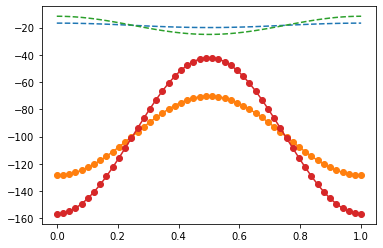

In [169]:
alpha_1 = SVC_coef[0]/Max_M[0]/hp
gamma_1 = SVC_coef[1]/Max_M[1]/hq
betta_1 = SVC_coef[2]/Max_M[2]/hp
delta_1 = SVC_coef[3]/Max_M[3]/hp
alpha_2 = SVC_coef[4]/Max_M[4]/hr
gamma_2 = SVC_coef[5]/Max_M[5]/hs
betta_2 = SVC_coef[6]/Max_M[6]/hr
delta_2 = SVC_coef[7]/Max_M[7]/hr

import numpy as np
import random as rn 
import matplotlib.pyplot as plt

alpha_j = 0.0016
betta_j = 0.0000007
gamma_j = 0.00008
delta_j = 0.000016

alpha_a = 0.006
betta_a = 0.000000075
gamma_a = 0.004
delta_a = 0.00006

sigma1 = 1
sigma2 = 1
D = 120
D0 = 70
t = np.linspace(0, 1)
#Какие то стандартные значения из таблицы макс фитнеса, ну или просто 
Aj = rn.uniform(-D, 0)
Aa = rn.uniform(-D, 0)

Bj = -(alpha_a*sigma1 - 2*delta_a*(Aj + D0))/(2*(4*(np.pi**2)*betta_a + delta_a))
x1 = Aj + Bj*np.cos(2*np.pi*t)

Ba = -(alpha_j*sigma1 - 2*delta_j*(Aa + D0))/(2*(4*(np.pi**2)*betta_j + delta_j))
x2 = Aa + Ba*np.cos(2*np.pi*t)

print('Эмпирические')
print('Молодые особи    ', Aj, Bj)
print('Взрослые особи   ', Aa, Ba)



Bj = -(alpha_1*sigma1 - 2*delta_1*(Aj + D0))/(2*(4*(np.pi**2)*betta_1 + delta_1))
x3 = Aj + Bj*np.cos(2*np.pi*t)
Ba = -(alpha_2*sigma1 - 2*delta_2*(Aa + D0))/(2*(4*(np.pi**2)*betta_2 + delta_2))
x4 = Aa + Ba*np.cos(2*np.pi*t)

print('SVM')
print('Молодые особи    ', Aj, Bj)
print('Взрослые особи   ', Aa, Ba)
plt.plot(t, x1, '--') #Молодые
plt.plot(t, x2, '-o') #Пожилые
plt.plot(t, x3, '--') #Молодые
plt.plot(t, x4, '-o') #Пожилые
plt.show()

In [74]:
from sympy import *

s, p, q, r = symbols('s p q r')
print(diff(diff(-s - p - q + (4*r*p + (p + q - s)**2)**(1/2), q), r))


-2.0*p*(1.0*p + 1.0*q - 1.0*s)/(4*p*r + (p + q - s)**2)**1.5


In [75]:
from scipy.optimize import differential_evolution
from scipy.optimize import NonlinearConstraint
from scipy.optimize import LinearConstraint

def func(v):
    Aj, Aa = v[0], v[1]
    Bj = -(alpha_j*sigma1 - 2*delta_j*(Aj  + D0))/(2*(4*(np.pi**2)*betta_j + delta_j))
    Ba = -(alpha_a*sigma1 - 2*delta_a*(Aa  + D0))/(2*(4*(np.pi**2)*betta_a + delta_a))
    M1 = (sigma1*(Aj + D))
    M2 = (-sigma2*(Aj + D + Bj/2))
    M3 = (-2*(np.pi*Bj)**2)
    M4 = (-((Aj + D0)**2 + (Bj**2)/2))
    M5 = (sigma1*(Aa + D))
    M6 = (-sigma2*(Aa + D + Ba/2))
    M7 = (-2*(np.pi*Ba)**2)
    M8 = (-((Aa + D0)**2 + (Ba**2)/2))
    s = gamma_a*M6
    p = alpha_j*M1 + betta_j*M3 + delta_j*M4
    q = gamma_j*M2
    r = alpha_a*M5 + betta_a*M7 + delta_a*M8
    
    return -(-s - p - q + np.sqrt(4*r*p + (p + q - s)**2))

def constr_f1(v):
    Aj, Aa = v[0], v[1]
    Bj = -(alpha_j*sigma1 - 2*delta_j*(Aj  + D0))/(2*(4*(np.pi**2)*betta_j + delta_j))
    Ba = -(alpha_a*sigma1 - 2*delta_a*(Aa  + D0))/(2*(4*(np.pi**2)*betta_a + delta_a))
    M1 = (sigma1*(Aj + D))
    M2 = (-sigma2*(Aj + D + Bj/2))
    M3 = (-2*(np.pi*Bj)**2)
    M4 = (-((Aj + D0)**2 + (Bj**2)/2))
    M5 = (sigma1*(Aa + D))
    M6 = (-sigma2*(Aa + D + Ba/2))
    M7 = (-2*(np.pi*Ba)**2)
    M8 = (-((Aa + D0)**2 + (Ba**2)/2))
    s = gamma_a*M6
    p = alpha_j*M1 + betta_j*M3 + delta_j*M4
    q = gamma_j*M2
    r = alpha_a*M5 + betta_a*M7 + delta_a*M8
    return -(4*r*p + (p + q - s)**2)

def constr_f2(v):
    Aj = v[0]
    # Bj = -(alpha_j*sigma1 - 2*delta_j*(Aj  + C0))/(2*(4*(np.pi**2)*beta_j + delta_j))
    Bj = -(alpha_j*sigma1 - 2*delta_j*(Aj  + D0))/(2*(4*(np.pi**2)*betta_j + delta_j))
    return -min(Aj+D,-1*Aj) + np.abs(Bj)

def constr_f3(v):
    Aa = v[1]
    Ba = -(alpha_a*sigma1 - 2*delta_a*(Aa  + D0))/(2*(4*(np.pi**2)*betta_a + delta_a))
    return -min(Aa+D,-1*Aa) + np.abs(Ba)


nlc1 = NonlinearConstraint(constr_f1, -np.inf, 0)
nlc2 = NonlinearConstraint(constr_f2, -np.inf, 0)
nlc3 = NonlinearConstraint(constr_f3, -np.inf, 0)

nlc=(nlc1,nlc2,nlc3)
bounds = ((-D, 0), (-D, 0))
result_DE = differential_evolution(func, bounds, constraints=(nlc))
result_DE

C:\Users\evgen\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


           constr: [array([0.]), array([0.]), array([0.])]
 constr_violation: 0.0
              fun: -1.0828400812131531
              jac: [array([[ 0.00016988, -0.00589051]]), array([[ 1.36667903, -0.        ]]), array([[-0.        ,  1.95297272]]), array([[1., 0.],
       [0., 1.]])]
            maxcv: 0.0
          message: 'Optimization terminated successfully.'
             nfev: 278
              nit: 12
          success: True
                x: array([-19.44145605,  -9.75933043])

Оптимизация DE
-9.759330432550929 9.759078354079097
-19.44145604802104 0.20480635463703145


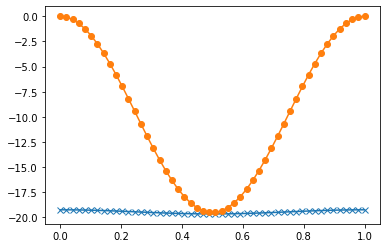

In [76]:
Aj = result_DE.x[0]
Aa = result_DE.x[1]

Bj = -(alpha_j*sigma1 - 2*delta_j*(Aj  + D0))/(2*(4*(np.pi**2)*betta_j + delta_j))
Ba = -(alpha_a*sigma1 - 2*delta_a*(Aa  + D0))/(2*(4*(np.pi**2)*betta_a + delta_a))

import numpy as np
import random as rn 
import matplotlib.pyplot as plt

t = np.linspace(0, 1)
#Какие то стандартные значения из таблицы макс фитнеса, ну или просто 

x1 = Aj + Bj*np.cos(2*np.pi*t)
x2 = Aa + Ba*np.cos(2*np.pi*t)
print('Оптимизация DE')
print(Aa, Ba)
print(Aj, Bj)
plt.plot(t, x1, '-x') #Молодые
plt.plot(t, x2, '-o') #Пожилые
plt.show()

In [ ]:
12222222222222222222222 asd